In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# I like bigger plots
plt.rcParams['figure.dpi']=100

# Frensel diffraction and Contact Lithography

One of the early techniques developed to pattern computer chips is called "Contact Lithography". Contact lithography works by coating a silicon wafer or chip with a UV sensitive polymer called "photoresist" and then subsequently exposing it to UV light through a metal mask. After "developing" the photoresist (a chemical process that removes the resist where it was exposed, for example), then you can reproduce an exact copy of the patten of the metal mask on your chip.

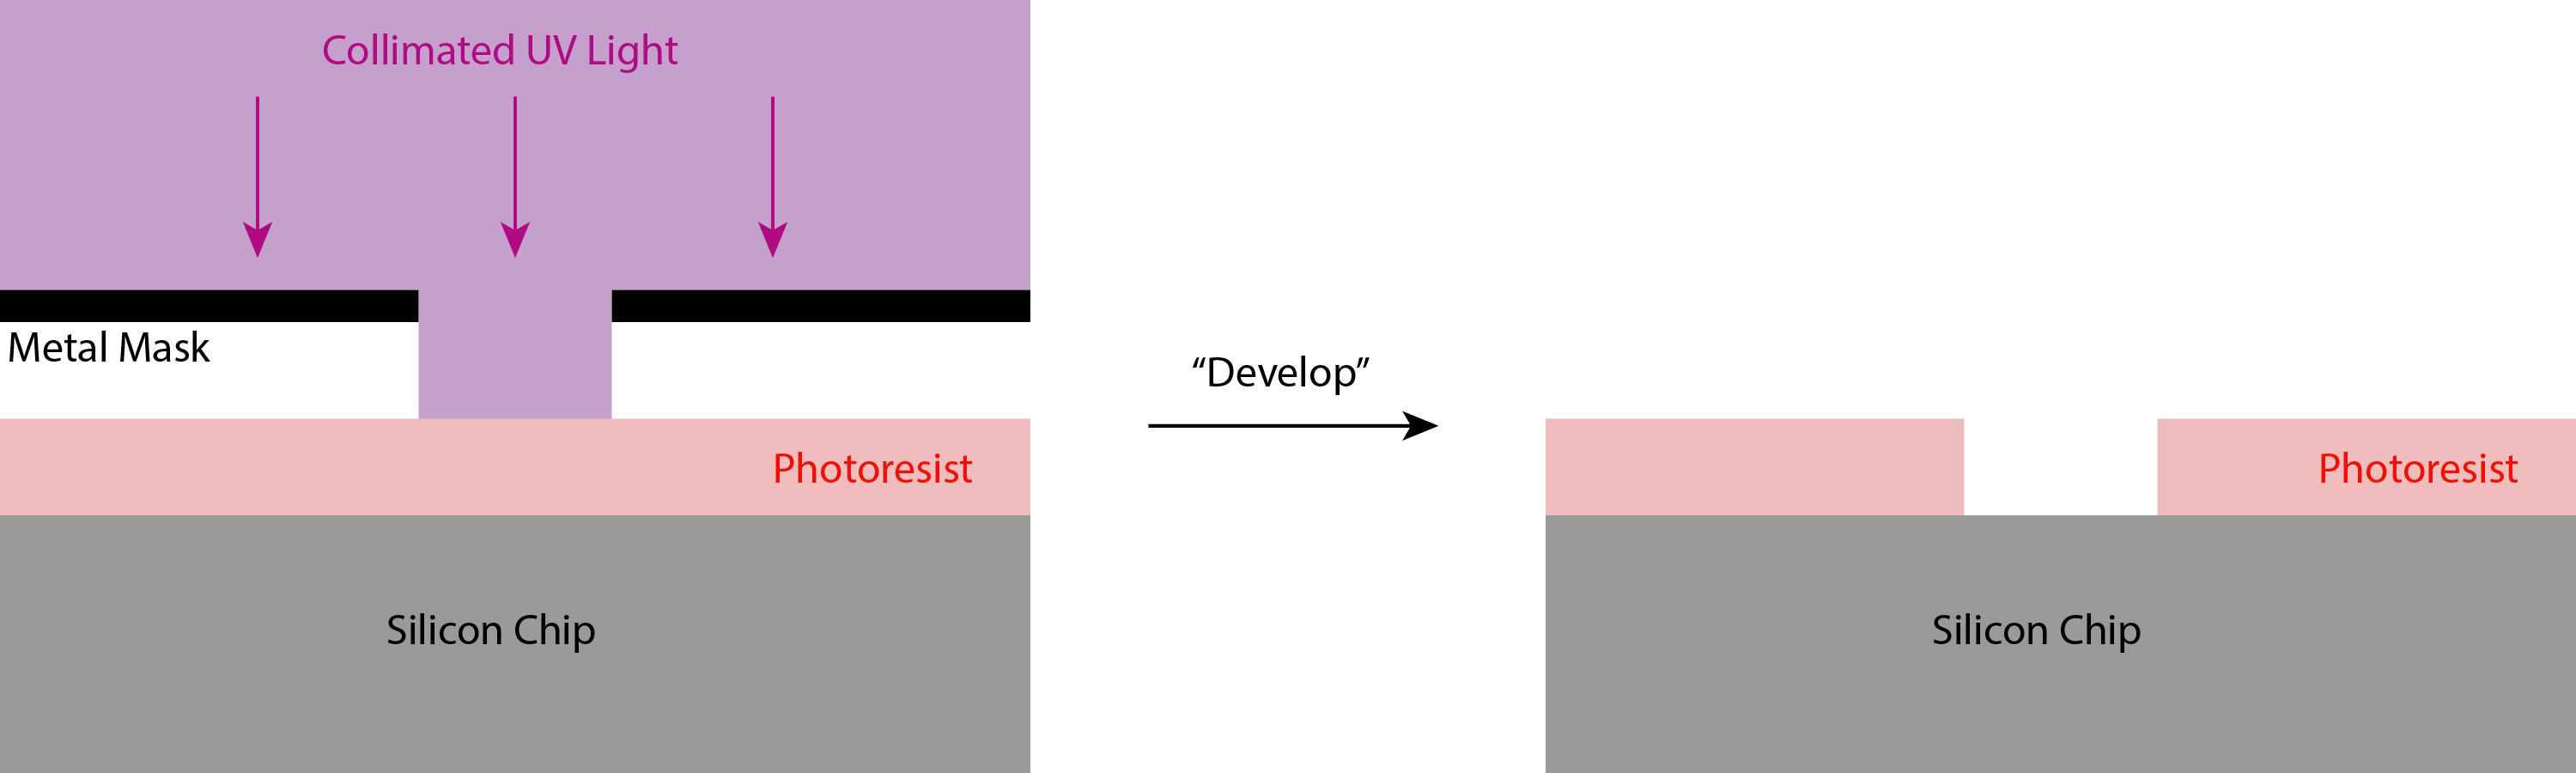</img>

Using classical ray optics to predict the "shadow" of the mask, for well collimated light, the reproduction of the pattern of the mask on the wafer should be perfect! However, since light is a wave, it will diffract around the edges of the mask and change the pattern of the light intensity and the exposed pattern can look different than the shape of the mask, as you can see in this example of an electron microscope image of developed photoresist from the lab reports of students from the Nanotechnology course AP3222: 

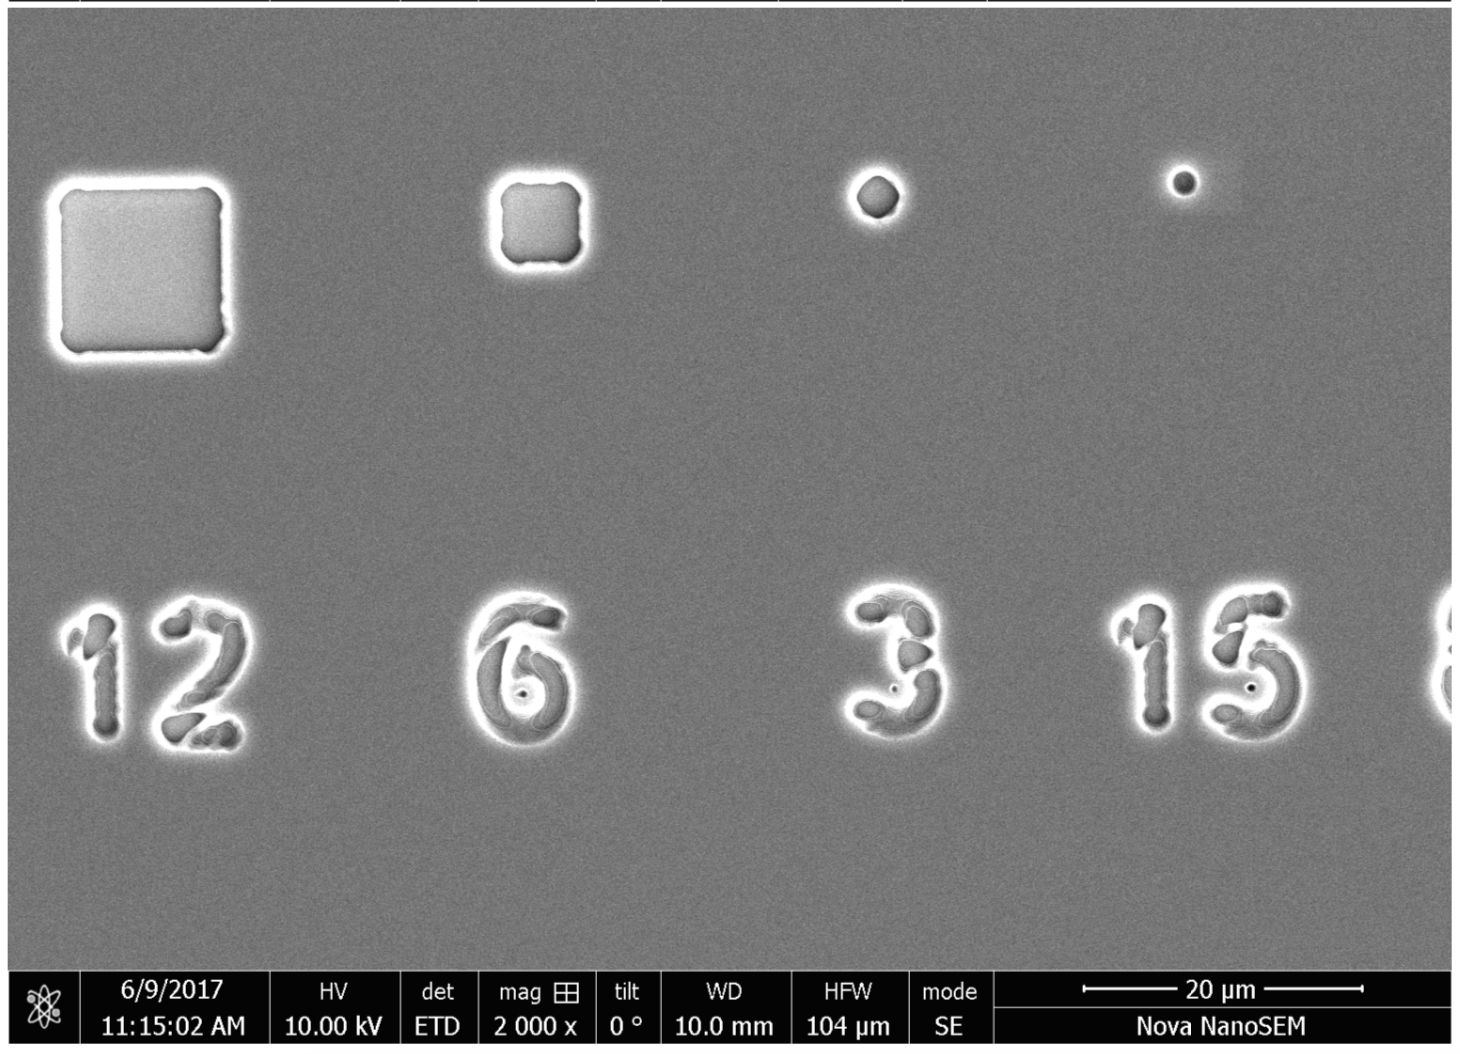</img>

The patterns at the top were supposed to be squares of different sizes: 12, 6, 3 and 1.5 microns. For the smallest square, it doesn't even look square anymore, while even the largest square has strange patterns around the corners. 

In this question, you will calculate the diffraction patterns, and use a simple approximation of how the chemistry of photoresist works to see if you can predict similar shapes as seen in the images. 

Since the mask is not in the "far field limit" where we did the calculations earlier for Fraunhofer diffraction, we will have to use a different technique for calculating the diffracted light pattern. The example above can be relatively well captured by the <a href=https://en.wikipedia.org/wiki/Fresnel_diffraction>Fresnel diffraction</a> equation for the near-field limit. 

In <a href=https://en.wikipedia.org/wiki/Fresnel_diffraction#Fresnel_diffraction>Frensnell diffraction</a>, the electric field at a distance $z$ from the mask opening can be calculated using a 2-dimensional convolution:

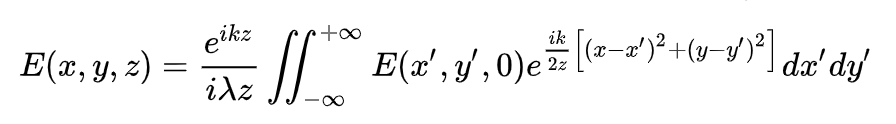</img>

We will perform this convolution in Fourier space. The transfer function for the Fresnell convolution integral is given by:

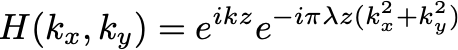</img>

In this formula, $z$ is the distance between the mask and the photoresist layer, $k_x$, and $k_y$ are the wave numbers of the Fourier transform in the $x-y$ plane, and $k = 2 \pi / \lambda$ is the wave vector of the incoming light. 


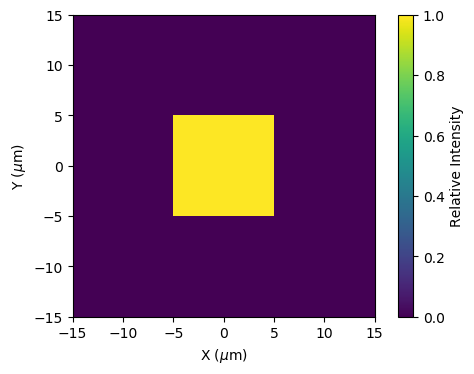

In [6]:
# Solution

# Define size of image, set up grid
L = 30e-6 
N = 2**8
x = np.linspace(-L/2, L/2, N)
y = np.linspace(-L/2, L/2, N)
X, Y = np.meshgrid(x, y)

# Now the mask
R = 5e-6
M =  (X**2 < R**2) * (Y**2 < R**2)

# Now the plot
dim=np.array([-L/2, L/2, -L/2, L/2])*1e6
plt.imshow(M, extent=dim)
plt.xlabel("X ($\mu$m)")
plt.ylabel("Y ($\mu$m)")
# There is a matplotlib bug with this type of "mask" image, 
# you must first set the colobar limit manually
plt.clim((0,1))
plt.colorbar(label="Relative Intensity");

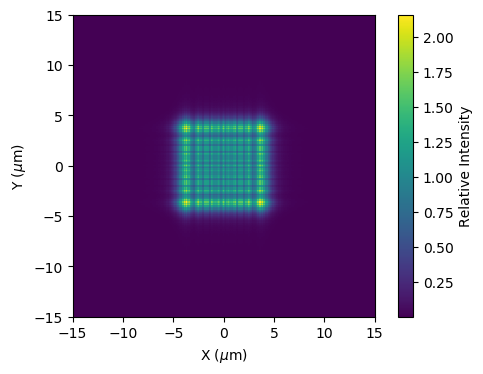

In [10]:
# Define some constants
lam = 380e-9
k=2*np.pi/lam
z = 6e-6

# Now use the FFT to calculate the convolution

# The FFT of M
Mt = np.fft.fft2(M)

# This is a bit tricky
dx = x[1]-x[0]
f = np.fft.fftfreq(len(x), d=dx)
KX,KY = np.meshgrid(f,f)

# Now the transfer function
H = np.exp(1j*k*z)*np.exp(-1j*np.pi*lam*z*(KX**2+KY**2))

Mt2 = H*Mt
M2 = np.fft.ifft2(Mt2)

# The diffracted intensity pattern
I = np.abs(M2)**2

plt.imshow(I, extent=dim)
plt.xlabel("X ($\mu$m)")
plt.ylabel("Y ($\mu$m)")
plt.colorbar(label="Relative Intensity");

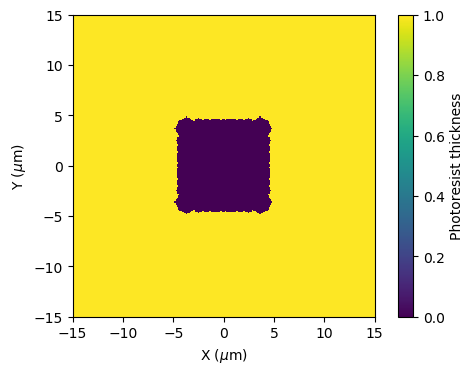

In [11]:
# Solutions

threshold = 0.5
resist = I < threshold

plt.imshow(resist, extent=dim)
plt.xlabel("X ($\mu$m)")
plt.ylabel("Y ($\mu$m)")
plt.clim(0,1)
plt.colorbar(label="Photoresist thickness");

answer_2c = resist

In [14]:
def update(lam=380, z=6, thr=0.5):
    # Define some constants
    lam *= 1e-9
    k=2*np.pi/lam
    z *= 1e-6

    # Now use the FFT to calculate the convolution

    # The FFT of M
    Mt = np.fft.fft2(M)

    # This is a bit tricky
    dx = x[1]-x[0]
    f = np.fft.fftfreq(len(x), d=dx)
    KX,KY = np.meshgrid(f,f)

    # Now the transfer function
    H = np.exp(1j*k*z)*np.exp(-1j*np.pi*lam*z*(KX**2+KY**2))

    Mt2 = H*Mt
    M2 = np.fft.ifft2(Mt2)

    # The diffracted intensity pattern
    I = np.abs(M2)**2

    plt.subplots(figsize=(15,6))
    plt.subplot(121)
    plt.imshow(I, extent=dim)
    plt.xlabel("X ($\mu$m)")
    plt.ylabel("Y ($\mu$m)")
    plt.colorbar(label="Relative Intensity");

    plt.subplot(122)
    resist = I < thr
    plt.imshow(resist, extent=dim)
    plt.xlabel("X ($\mu$m)")
    plt.ylabel("Y ($\mu$m)")
    plt.clim(0,1)
    plt.colorbar(label="Photoresist thickness");
    
from ipywidgets import interact

interact(update, lam=(100,800,50), z=(0,20,0.1), thr=(0,1,0.01));

interactive(children=(IntSlider(value=380, description='lam', max=800, min=100, step=50), FloatSlider(value=6.…